## Dataset

In [42]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/saisrivishwanath/Documents/PM Accelerator/GlobalWeatherRepository.csv')

In [4]:
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.60,97.3,0.900,0.100,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.100,13.400,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.600,0.200,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46377,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1736504100,2025-01-10 06:15,22.2,72.0,Clear,2.2,3.6,153,SSE,1012.0,29.88,0.00,0.00,65,0,24.6,76.3,10.0,6.0,0.0,4.2,6.8,1250.60,75.0,10.730,3.515,16.095,20.720,2,2,06:49 AM,06:22 PM,03:18 PM,03:30 AM,Waxing Gibbous,83
46378,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1736504100,2025-01-10 17:15,17.1,62.8,Sunny,5.1,8.3,57,ENE,1026.0,30.30,0.00,0.00,55,0,17.1,62.8,10.0,6.0,0.0,7.0,11.3,900.95,72.0,14.615,33.855,29.600,29.970,2,3,06:36 AM,05:33 PM,01:57 PM,02:50 AM,Waxing Gibbous,79
46379,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1736506800,2025-01-10 14:00,20.7,69.2,Sunny,8.5,13.7,246,WSW,1014.0,29.94,0.00,0.00,29,2,20.7,69.2,10.0,6.0,6.4,9.8,15.7,345.95,93.0,0.370,2.035,15.910,46.620,2,2,06:32 AM,05:49 PM,02:25 PM,02:56 AM,Waxing Gibbous,80
46380,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1736506800,2025-01-10 13:00,23.9,75.0,Patchy rain nearby,11.4,18.4,2,N,1009.0,29.80,0.42,0.02,70,77,25.6,78.1,9.0,5.0,6.8,14.6,23.5,505.05,68.0,0.925,11.100,21.830,22.015,2,2,05:45 AM,06:44 PM,03:36 PM,02:03 AM,Waxing Gibbous,81


## Basic Assessment

In [5]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [6]:
df.shape

(46382, 41)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46382 entries, 0 to 46381
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       46382 non-null  object 
 1   location_name                 46382 non-null  object 
 2   latitude                      46382 non-null  float64
 3   longitude                     46382 non-null  float64
 4   timezone                      46382 non-null  object 
 5   last_updated_epoch            46382 non-null  int64  
 6   last_updated                  46382 non-null  object 
 7   temperature_celsius           46382 non-null  float64
 8   temperature_fahrenheit        46382 non-null  float64
 9   condition_text                46382 non-null  object 
 10  wind_mph                      46382 non-null  float64
 11  wind_kph                      46382 non-null  float64
 12  wind_degree                   46382 non-null  int64  
 13  w

In [8]:
df.duplicated().sum()

0

In [9]:
df.astype({'last_updated_epoch': 'float64', 'wind_degree':'float64','humidity':'float64', 'cloud':'float64', 
           'air_quality_us-epa-index':'float64', 'air_quality_gb-defra-index':'float64','moon_illumination':'float64'}).dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch              float64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                     float64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                        float64
cloud                           float64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


# checking missing value

In [10]:
df.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [11]:
df.drop_duplicates()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.60,97.3,0.900,0.100,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.100,13.400,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.600,0.200,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46377,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1736504100,2025-01-10 06:15,22.2,72.0,Clear,2.2,3.6,153,SSE,1012.0,29.88,0.00,0.00,65,0,24.6,76.3,10.0,6.0,0.0,4.2,6.8,1250.60,75.0,10.730,3.515,16.095,20.720,2,2,06:49 AM,06:22 PM,03:18 PM,03:30 AM,Waxing Gibbous,83
46378,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1736504100,2025-01-10 17:15,17.1,62.8,Sunny,5.1,8.3,57,ENE,1026.0,30.30,0.00,0.00,55,0,17.1,62.8,10.0,6.0,0.0,7.0,11.3,900.95,72.0,14.615,33.855,29.600,29.970,2,3,06:36 AM,05:33 PM,01:57 PM,02:50 AM,Waxing Gibbous,79
46379,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1736506800,2025-01-10 14:00,20.7,69.2,Sunny,8.5,13.7,246,WSW,1014.0,29.94,0.00,0.00,29,2,20.7,69.2,10.0,6.0,6.4,9.8,15.7,345.95,93.0,0.370,2.035,15.910,46.620,2,2,06:32 AM,05:49 PM,02:25 PM,02:56 AM,Waxing Gibbous,80
46380,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1736506800,2025-01-10 13:00,23.9,75.0,Patchy rain nearby,11.4,18.4,2,N,1009.0,29.80,0.42,0.02,70,77,25.6,78.1,9.0,5.0,6.8,14.6,23.5,505.05,68.0,0.925,11.100,21.830,22.015,2,2,05:45 AM,06:44 PM,03:36 PM,02:03 AM,Waxing Gibbous,81


In [12]:
numerical_columns = df.select_dtypes(include=['float64']).columns
print(numerical_columns)

Index(['latitude', 'longitude', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'pressure_mb',
       'pressure_in', 'precip_mm', 'precip_in', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10'],
      dtype='object')


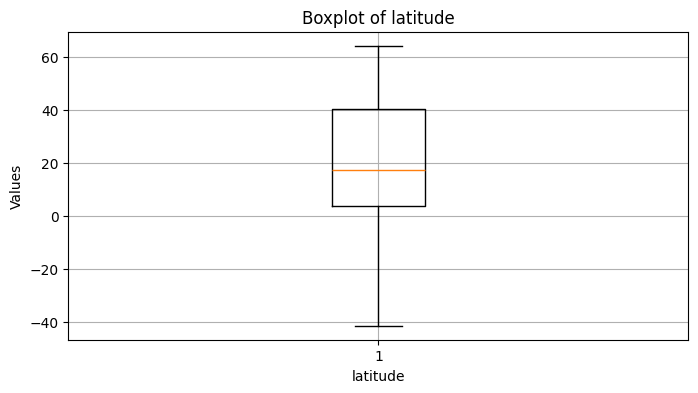

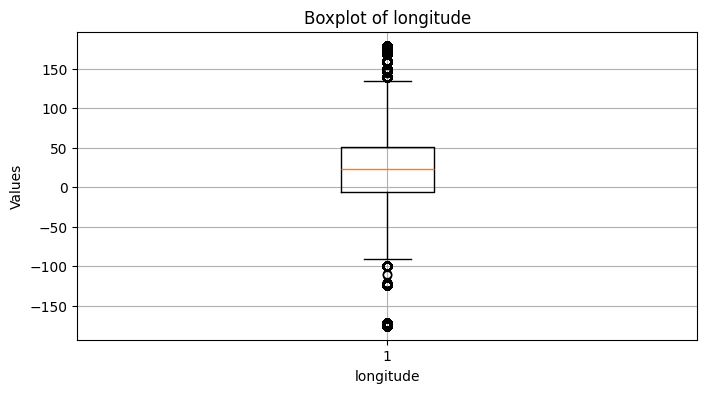

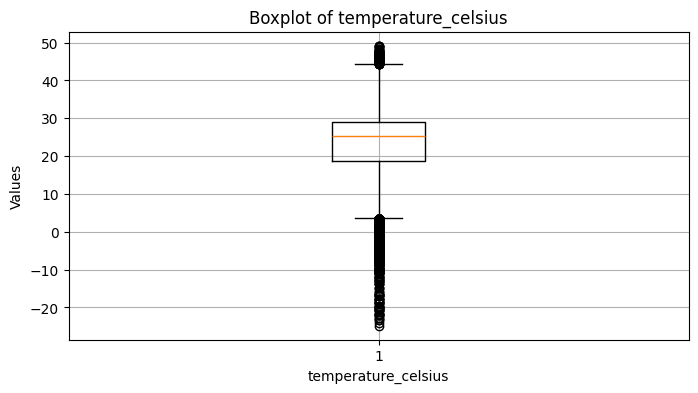

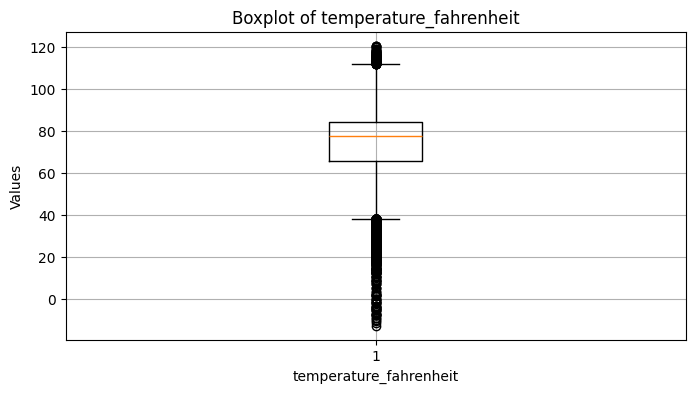

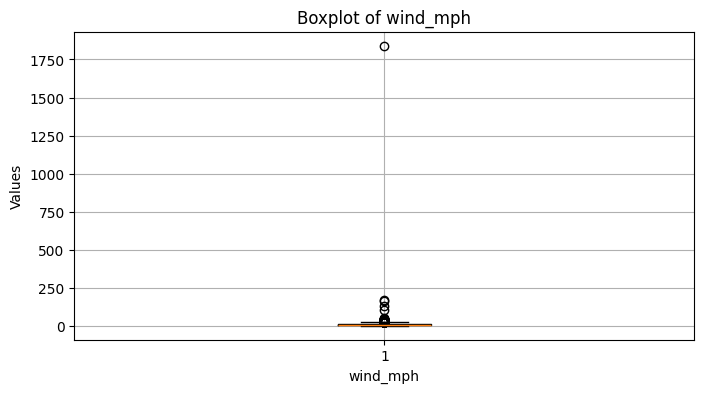

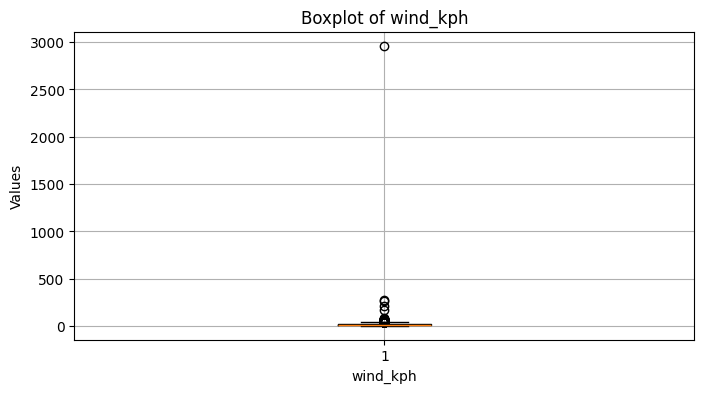

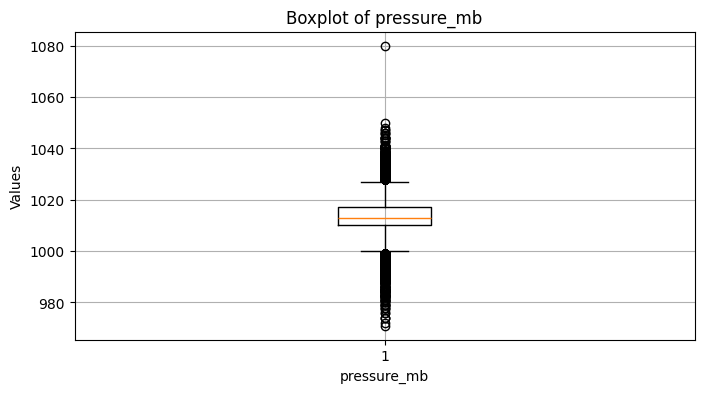

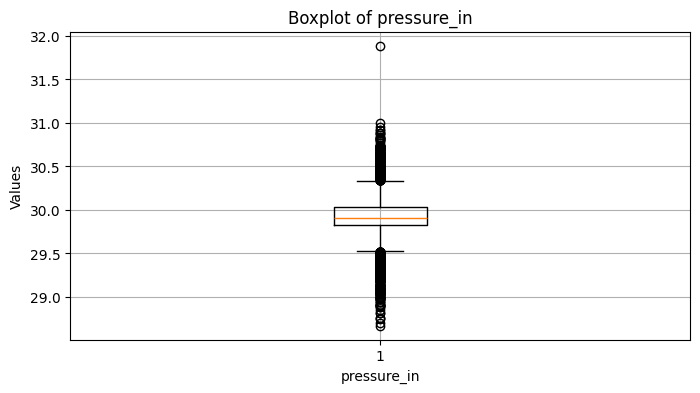

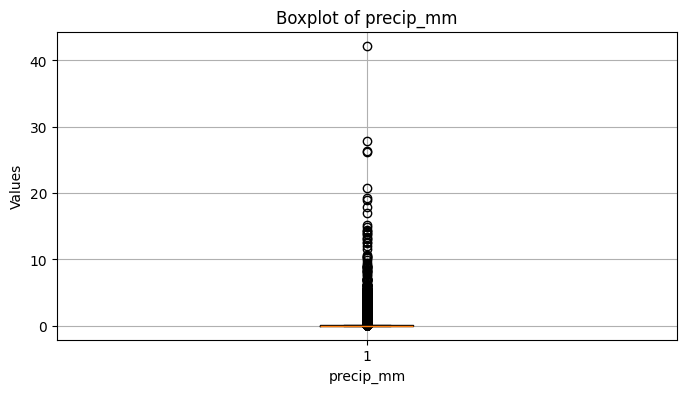

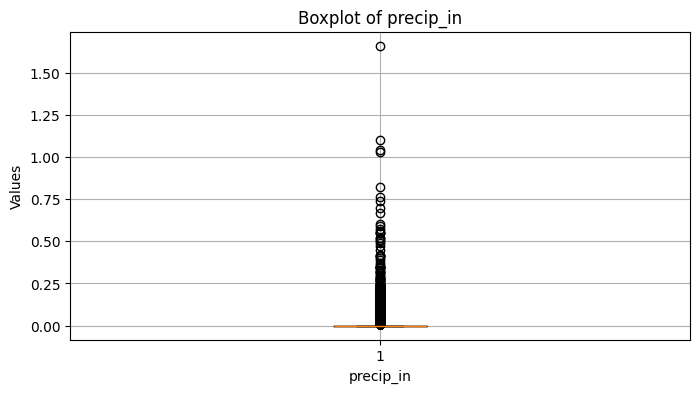

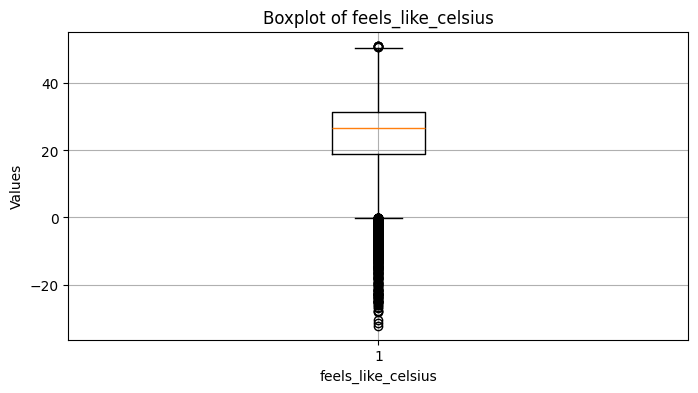

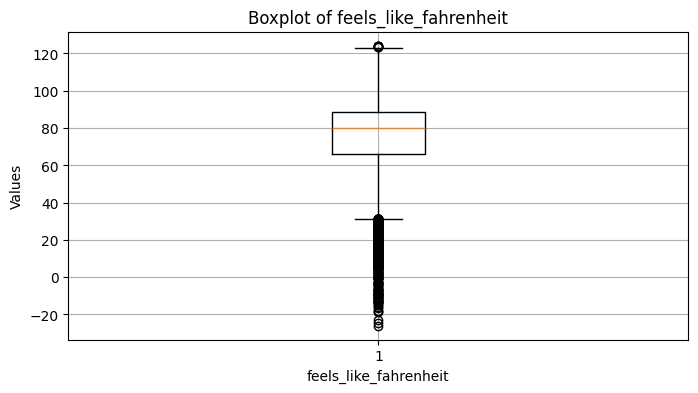

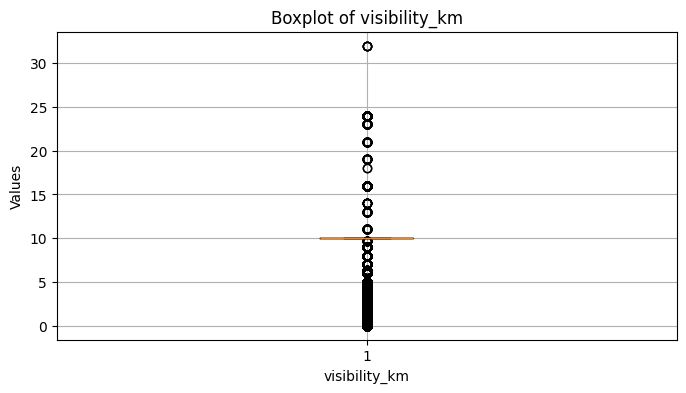

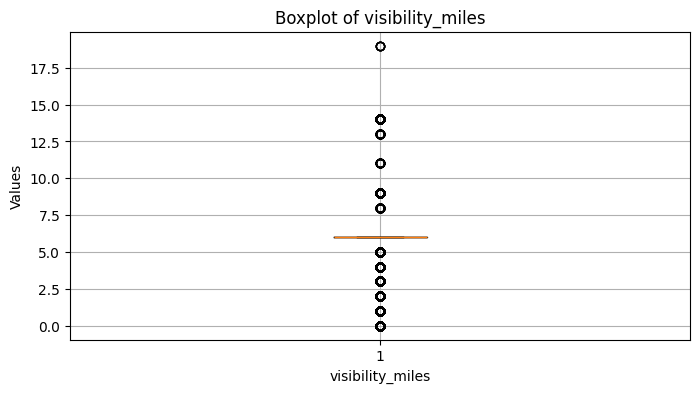

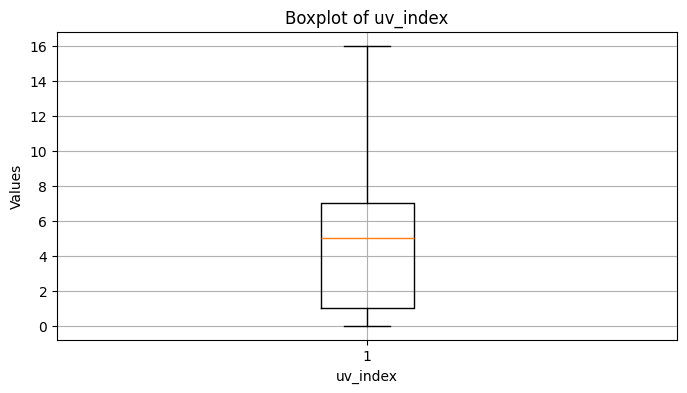

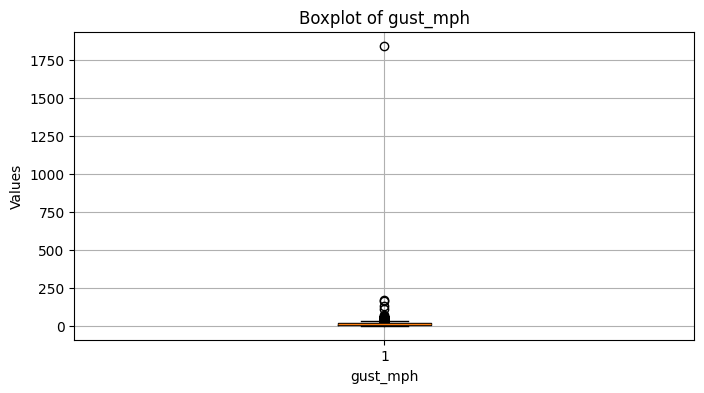

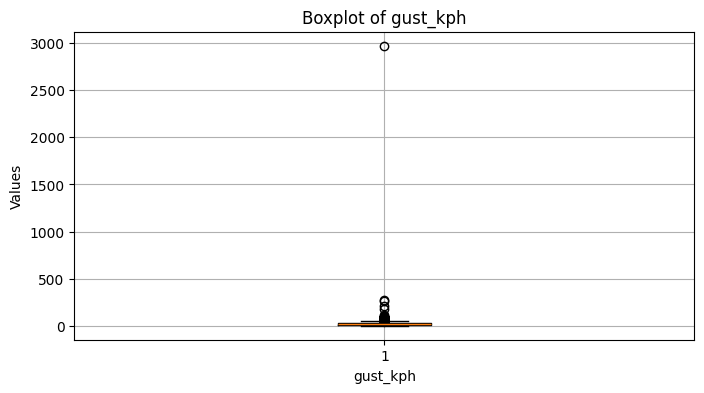

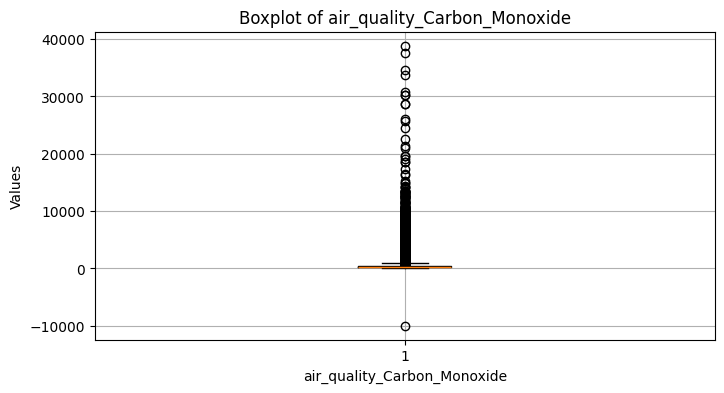

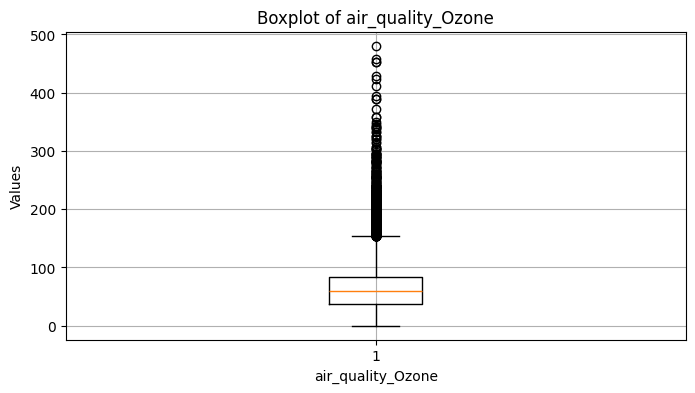

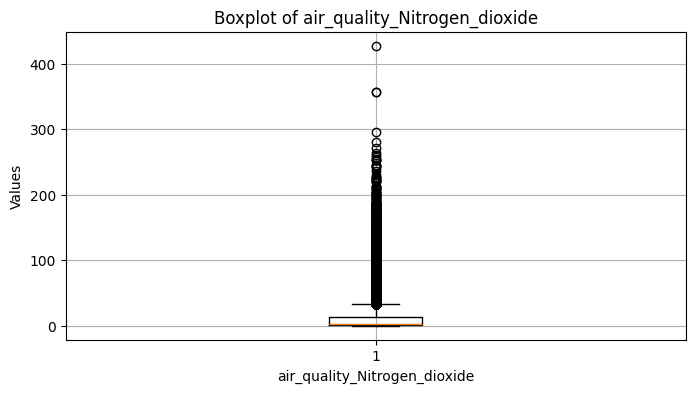

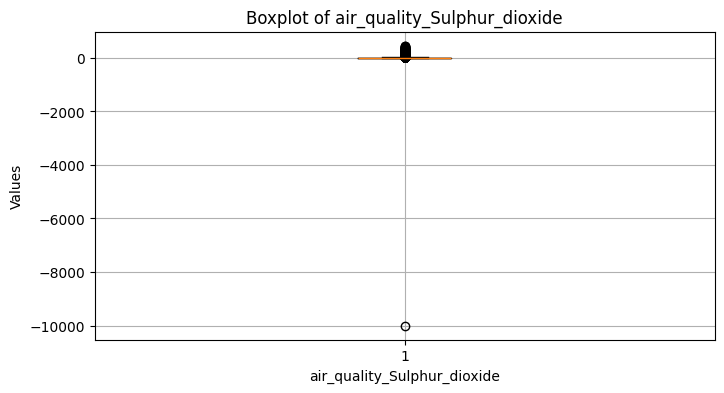

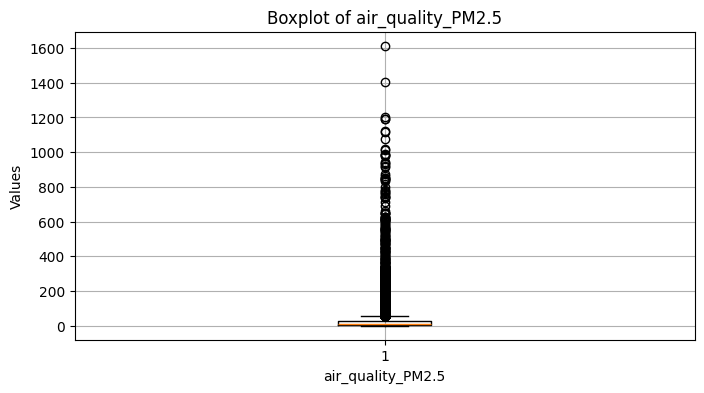

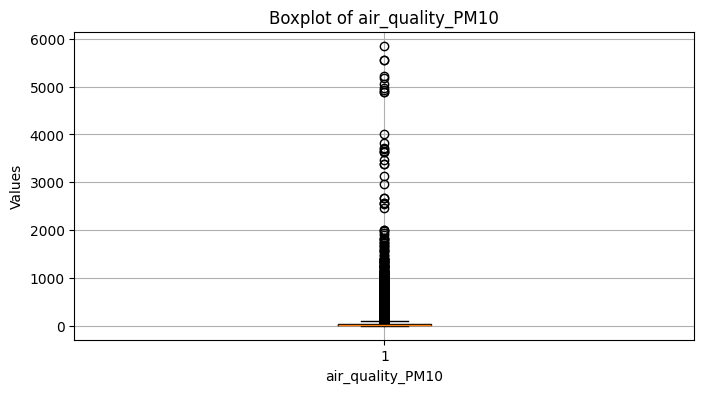

In [13]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  # Adjust the figure size
    plt.boxplot(df[column])  # Drop NaN values to avoid issues
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

In [14]:
import numpy as np

# Iterate through each numerical column
for column in numerical_columns:
    # Sort the data
    data = df[column].dropna().sort_values()
    median = np.median(data)
    #print(f"Median: {median}")
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lowestValue = Q1 - (1.5 * IQR)
    highestValue = Q3 + (1.5 * IQR)
    #print(f"Lowest allowed value: {lowestValue}, Highest allowed value: {highestValue}")
    
    # Replace outliers with the median
    df[column] = df[column].apply(
        lambda x: median if x <= lowestValue or x >= highestValue else x
    )

In [15]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numerical_columns])

scaled_df = df.copy()
scaled_df[numerical_columns] = scaled_data

# Display the first few rows of the scaled DataFrame
scaled_df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,0.628062,1.010393,Asia/Kabul,1715849100,2024-05-16 13:15,0.317567,0.311194,Partly Cloudy,0.058715,0.050845,338,NNW,-0.260801,-0.220650,-0.328278,0.0,24,30,-0.005505,-0.004759,0.0,0.0,0.781859,-0.330529,-0.328105,-0.347579,1.323967,-0.575713,-0.761353,-0.448512,0.252896,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,0.906222,0.042240,Europe/Tirane,1715849100,2024-05-16 10:45,-0.686496,-0.685154,Partly cloudy,-0.235659,-0.223621,320,NW,-0.260801,-0.286267,-0.328278,0.0,94,75,-0.679896,-0.674529,0.0,0.0,0.191861,-0.021514,-0.013515,-0.924447,1.148435,-0.604979,-0.789605,-1.033556,-1.014911,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,0.719556,-0.286688,Africa/Algiers,1715849100,2024-05-16 09:45,-0.158042,-0.157676,Sunny,0.290009,0.286101,280,W,-0.452952,-0.483120,-0.328278,0.0,29,0,-0.080438,-0.069958,0.0,0.0,0.191861,0.385085,0.382259,1.476403,-1.472237,-0.312313,2.968009,-0.288227,-0.169707,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,0.954012,-0.316698,Europe/Andorra,1715849100,2024-05-16 10:45,-2.364337,-2.362828,Light drizzle,-0.130525,-0.132132,215,SW,-1.221556,-1.139296,-0.328278,0.0,61,100,-2.306998,-2.292647,0.0,0.0,-0.693136,-0.493169,-0.490474,-1.086302,0.135273,-0.502546,-0.761353,-1.065613,-1.071602,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-1.143015,-0.087017,Africa/Luanda,1715849100,2024-05-16 09:45,0.238299,0.237933,Partly cloudy,0.016662,0.011635,150,SSE,-0.452952,-0.483120,-0.328278,0.0,89,50,0.358452,0.356799,0.0,0.0,1.076858,0.157390,0.169150,-0.139381,-1.262830,-0.312313,-0.242915,-0.202474,-0.183622,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


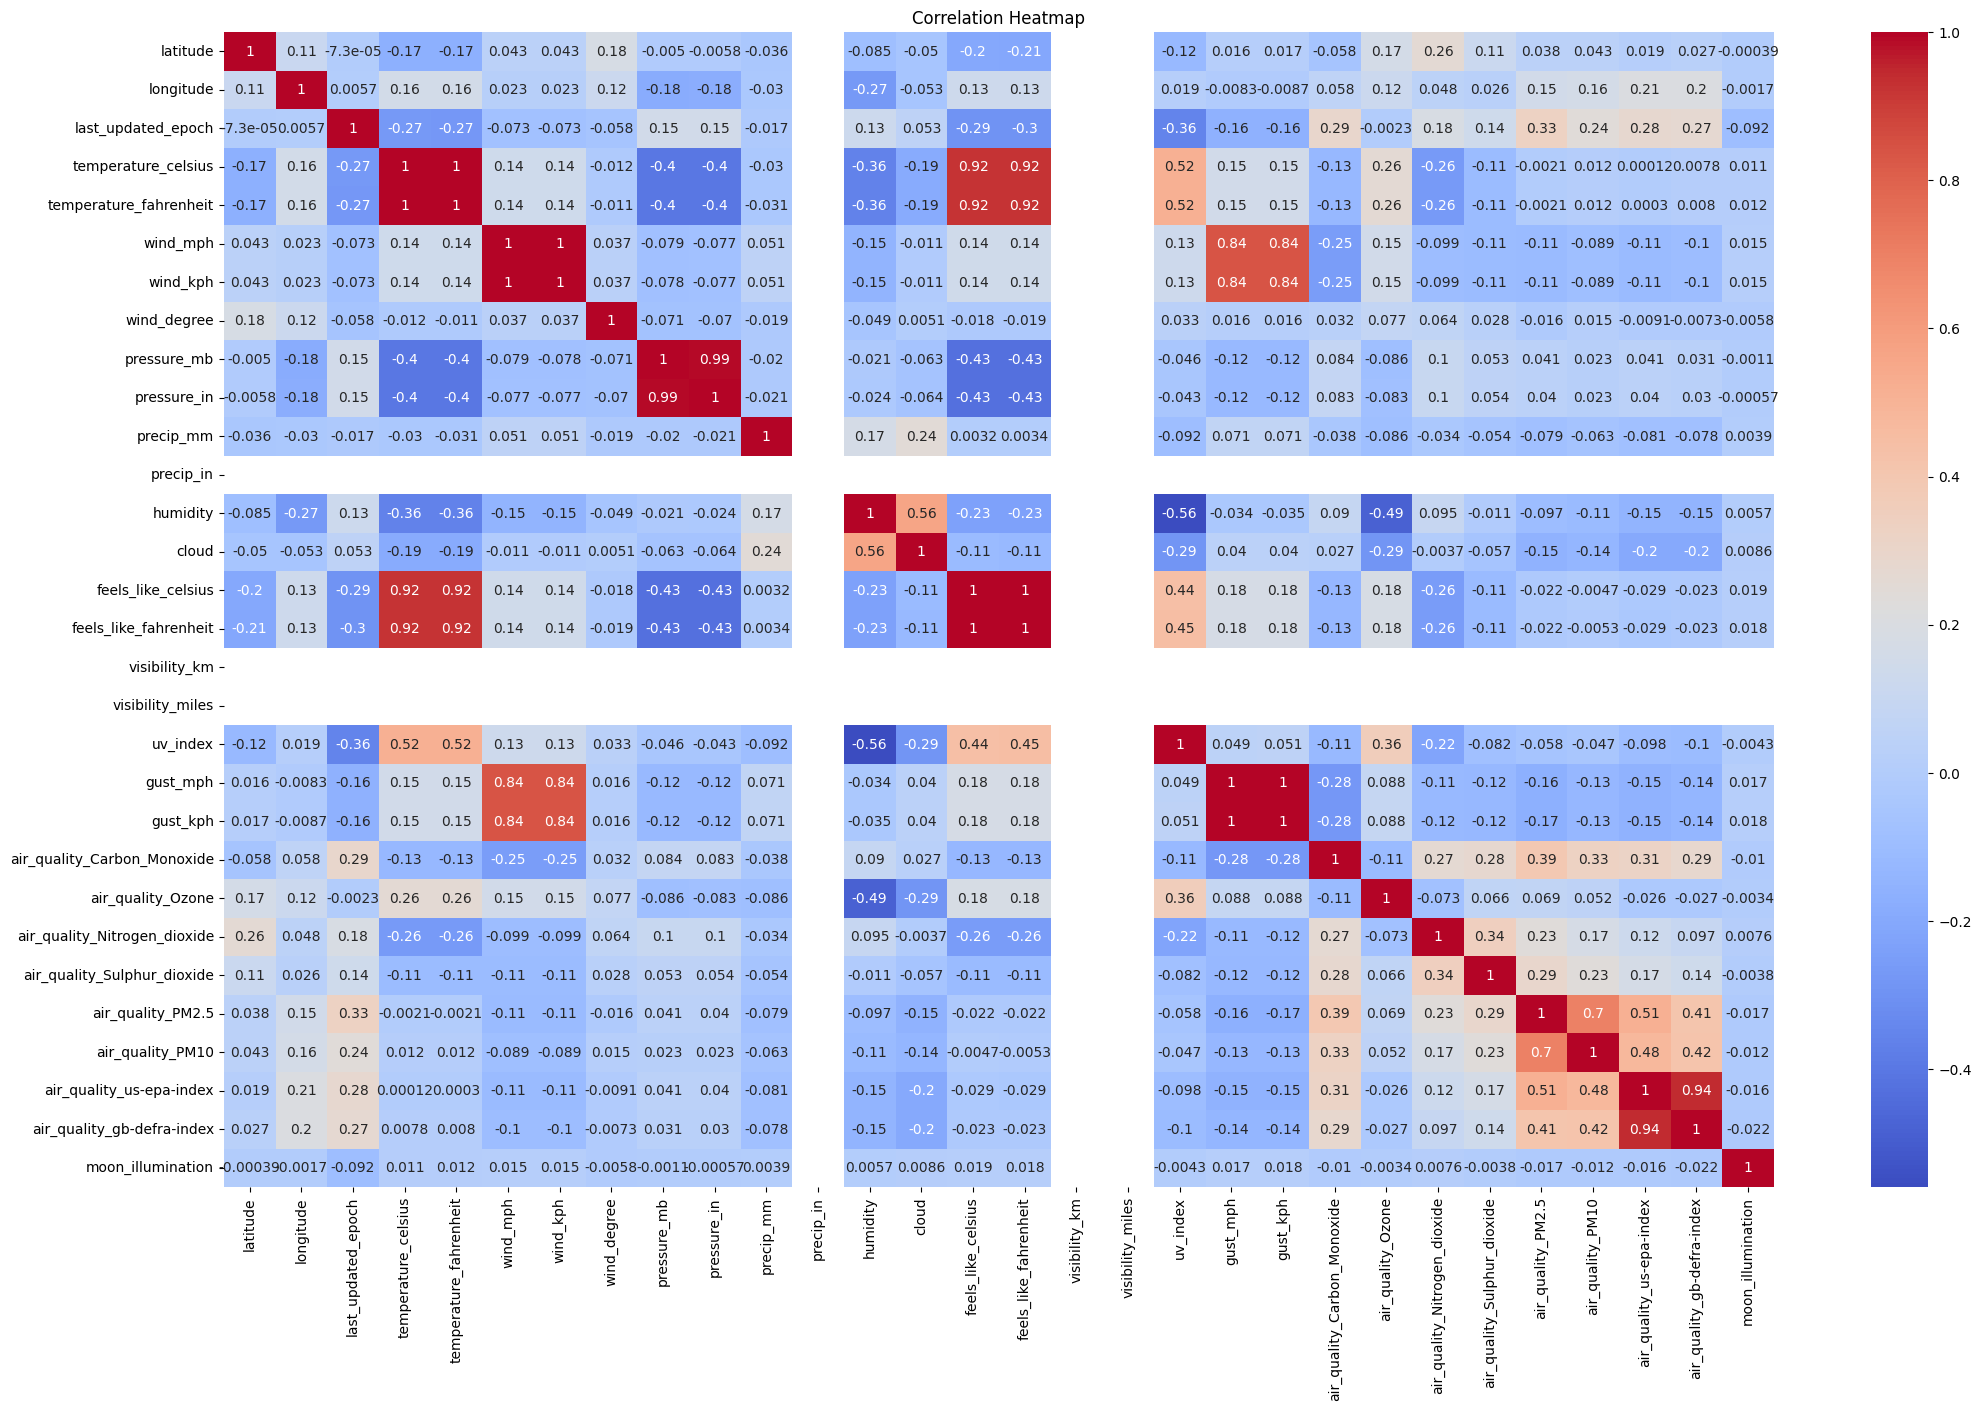

In [16]:
numeric_data = scaled_df.select_dtypes(include=['number'])
plt.figure(figsize=(25, 15))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/var/folders/xt/d93gxflj1fs_njyhj8x78xc00000gn/T/ipykernel_98817/812286178.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=scaled_df['month'], y=scaled_df['temperature_fahrenheit'], palette="coolwarm", inner="quartile")


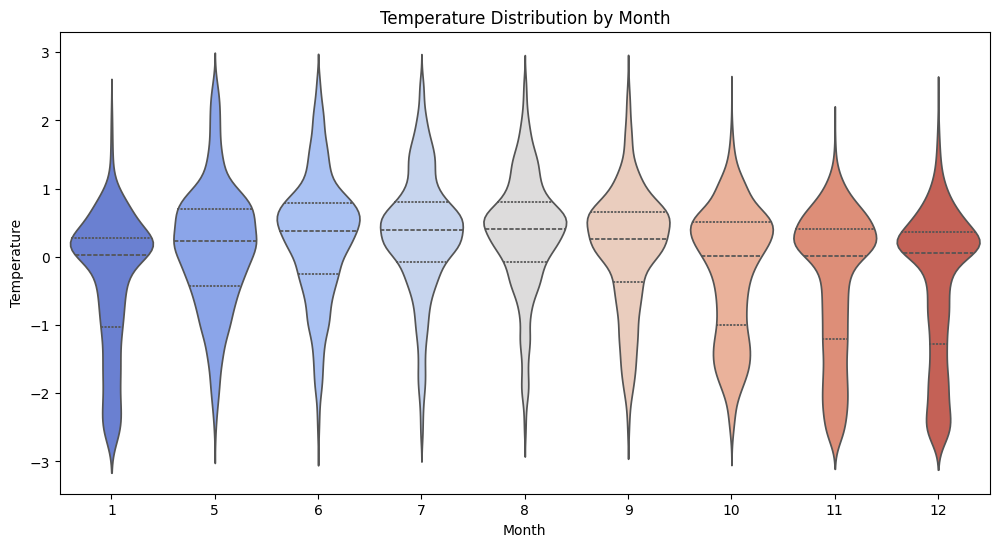

/var/folders/xt/d93gxflj1fs_njyhj8x78xc00000gn/T/ipykernel_98817/812286178.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=scaled_df['month'], y=scaled_df['precip_mm'], palette="Blues", inner="quartile")


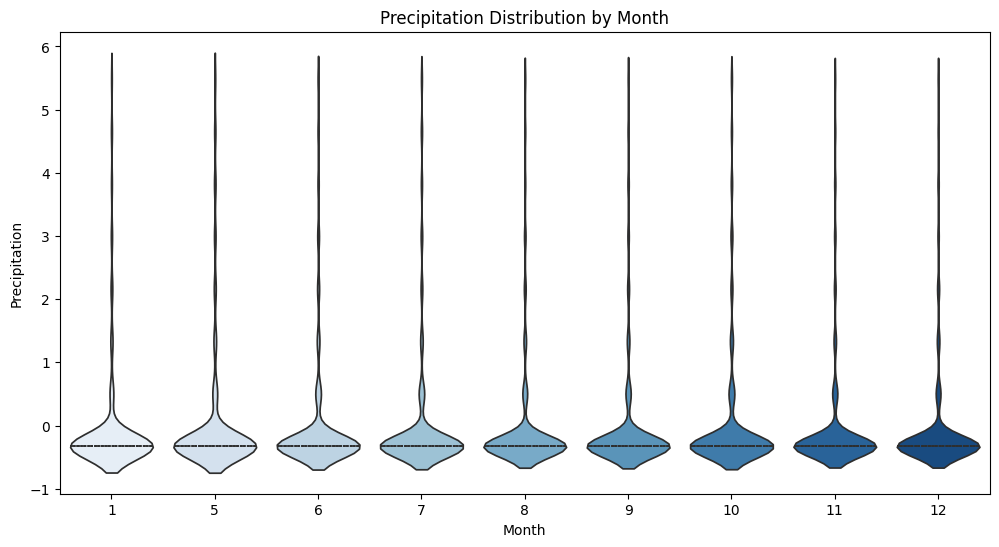

In [25]:
# Convert 'last_updated' column to datetime
scaled_df['last_updated'] = pd.to_datetime(scaled_df['last_updated'], errors='coerce')

# Drop rows where conversion failed (optional)
scaled_df = scaled_df.dropna(subset=['last_updated'])

# Extract the month from the datetime column
scaled_df['month'] = scaled_df['last_updated'].dt.month

# Violin plot for temperature
plt.figure(figsize=(12, 6))
sns.violinplot(x=scaled_df['month'], y=scaled_df['temperature_fahrenheit'], palette="coolwarm", inner="quartile")
plt.title("Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

# Violin plot for precipitation
plt.figure(figsize=(12, 6))
sns.violinplot(x=scaled_df['month'], y=scaled_df['precip_mm'], palette="Blues", inner="quartile")
plt.title("Precipitation Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.show()

In [28]:
# Data preprocessing for time series analysis
scaled_df['last_updated'] = pd.to_datetime(scaled_df['last_updated'])
scaled_df.set_index('last_updated', inplace=True)

In [33]:
# Model Building: Forecasting
# Use Exponential Smoothing for forecasting
model = ExponentialSmoothing(
    scaled_df['temperature_fahrenheit'], 
    seasonal='add', 
    seasonal_periods=12
).fit()

# Forecast next 12 periods
forecast = model.forecast(12)

/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/saisrivishwanath/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supporte

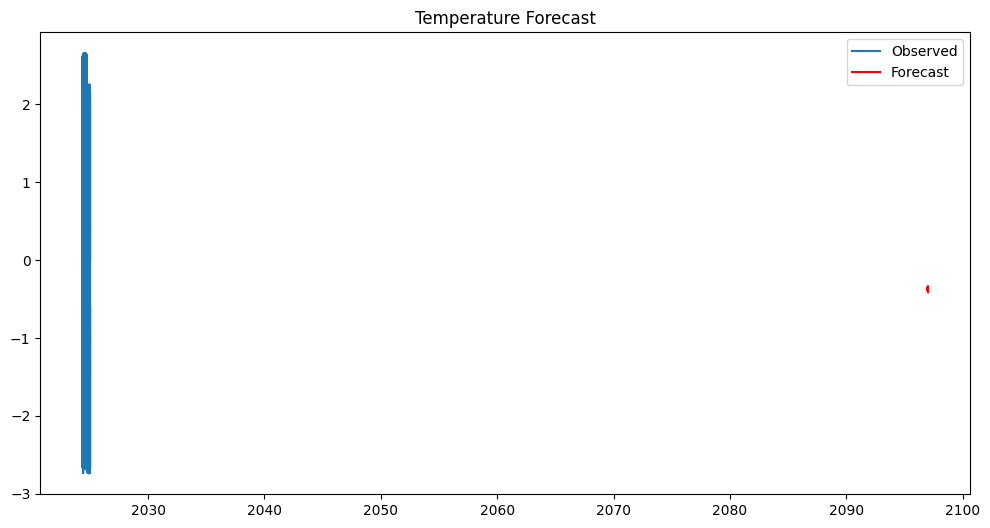

In [39]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['temperature_fahrenheit'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Temperature Forecast')
plt.legend()
plt.show()

In [43]:
y_true = scaled_df['temperature_fahrenheit'][-12:]
y_pred = forecast[:len(y_true)]
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred)}")

Mean Absolute Error (MAE): 0.7053660538119289
Mean Squared Error (MSE): 1.019882769645083
